# Introduction to neural network classification

In this notebook, we are going to write neural networks for classification problems.

A classication is where we try to classify something as one thing or another

Types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

Before starting, check these resources:

📖https://karpathy.github.io/2019/04/25/recipe/

📖https://playground.tensorflow.org/

## Creating data to view and fit

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Creation circles

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

# If you don't know what make_circles is and what does it do, GOOGLE IT FIRST !!

In [ ]:
# Let's check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Checking the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is hard to understand. So we'll visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


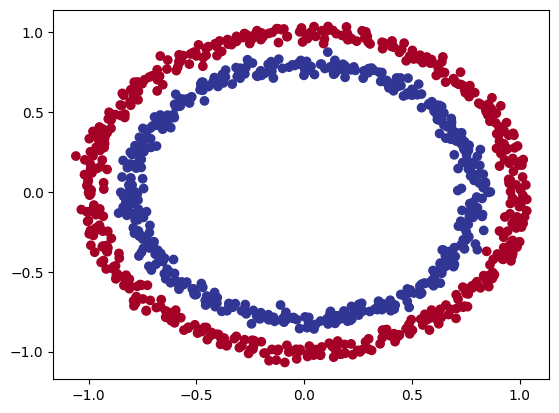

In [ ]:
# Let's visualize this with a plot!
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile a model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 6s 10ms/step - loss: 6.2446 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 6.2097 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 6.1978 - accuracy: 0.4870
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 6.1780 - accuracy: 0.4860
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 6.1527 - accuracy: 0.4850


In [ ]:
# Let's try and improve our model
model_1.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 5.4535 - accuracy: 0.4680


[5.453530788421631, 0.46799999475479126]

Since we are working on a binary classification problem and our model is
getting around ~50% accuracy... it's performing as if it's guessing.
So let's try adding another layer

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.9007 - accuracy: 0.4770
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.4770
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.4940
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.4940
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4910
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4840
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5080
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5020
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4860
Epoch 11/

# Let's try again with different approach

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 2s 7ms/step - loss: 3.2764 - accuracy: 0.4950
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.7975 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7324 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7135 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.7025 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4600
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.4780
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4690
Epoch 11/

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4070


[0.6933407187461853, 0.40700000524520874]

### Let's create a function to plot our model's prediction using numpy meshgrid (GOOGLE IT!!)

👉 You might not be able to understand the code at first, so ask ChatGpt to explain the code to you and also refer to [NumPy Meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) docs for better understanding

In [ ]:
def numpy_mesh_plot(model, X, y):
  x_min, x_max = X[:,0].min() - 0.1,X[:,0].max() + 0.1 # defining the axis boundaries of the plot and creating a meshgrid
  y_min, y_max = X[:,1].min() - 0.1,X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contour(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
doing binary classification


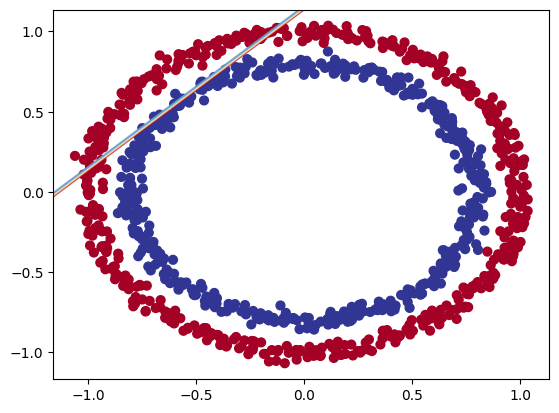

In [ ]:
numpy_mesh_plot(model_3, X, y)

In [ ]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Creating data
X_regression = tf.range(1,1000,5)
y_regression = tf.range(100,1100,5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [ ]:
# Setup random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

X_reg_train = np.reshape(X_reg_train, (X_reg_train.shape[0], 1))
X_reg_test = np.reshape(X_reg_test, (X_reg_test.shape[0], 1))

model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 515.0430 - mae: 515.0430
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 395.7764 - mae: 395.7764
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 281.1003 - mae: 281.1003
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 161.0474 - mae: 161.0474
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 55.6924 - mae: 55.6924
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 86.2878 - mae: 86.2878
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 84.7219 - mae: 84.7219
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 50.4813 - mae: 50.4813
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 50.4230 - mae: 50.4230
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 47.9121 - mae: 47.9121
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


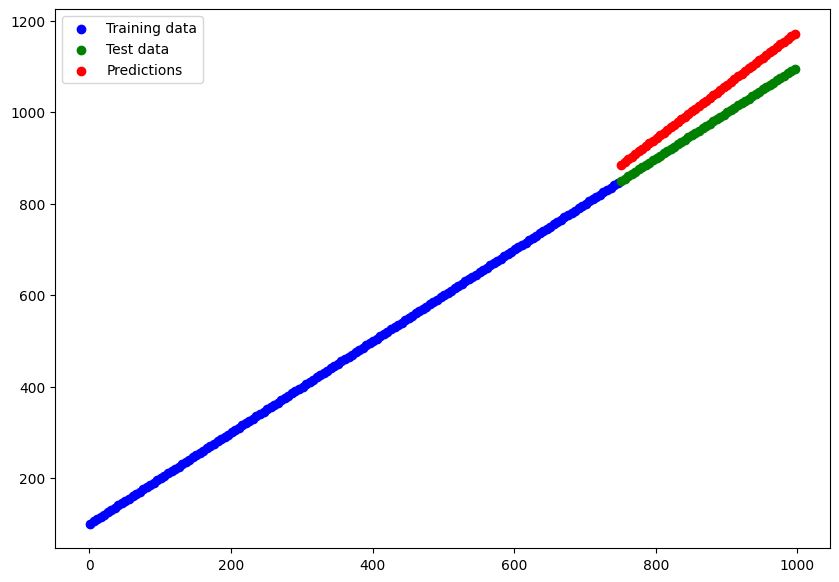

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2686 - accuracy: 0.4390
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2320 - accuracy: 0.4440
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2215 - accuracy: 0.4490
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1951 - accuracy: 0.4520
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1848 - accuracy: 0.4530
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1509 - accuracy: 0.4560
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0748 - accuracy: 0.4560
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0587 - accuracy: 0.4510
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0255 - accuracy: 0.4480
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9926 - accuracy: 0.4400
Epoch 11/

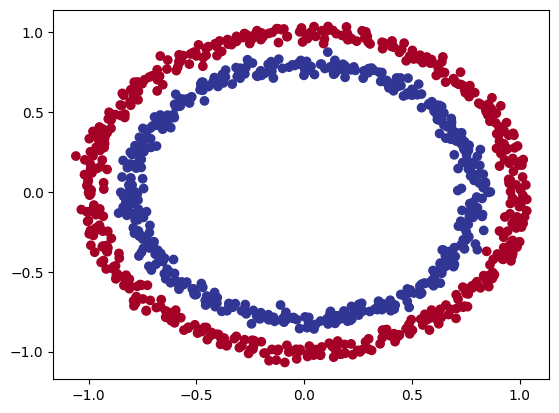

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classification


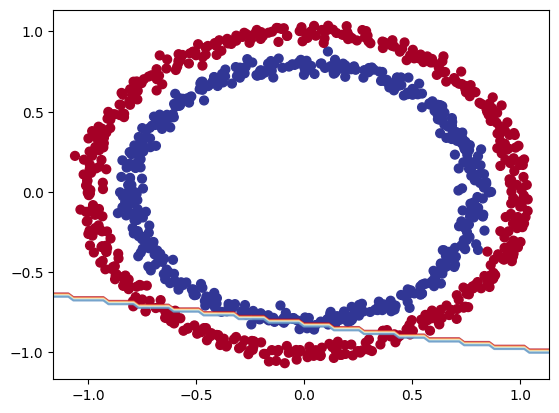

In [ ]:
numpy_mesh_plot(model=model_4, X=X, y=y)

### Let's build a neural network with a non-linear activation function

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 4.3255 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2707 - accuracy: 0.4640
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2416 - accuracy: 0.4640
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2116 - accuracy: 0.4650
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2029 - accuracy: 0.4630
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1654 - accuracy: 0.4600
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1190 - accuracy: 0.4590
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0714 - accuracy: 0.4610
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 4.0252 - accuracy: 0.4640
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9714 - accuracy: 0.4670
Epoch 11/

### Let's try to add 2 layers with 4 neurons each

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 4.4570 - accuracy: 0.3830
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1808 - accuracy: 0.3800
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9782 - accuracy: 0.3710
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5602 - accuracy: 0.3630
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3.2120 - accuracy: 0.3180
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 2.8830 - accuracy: 0.2360
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 2.8345 - accuracy: 0.2270
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 2.7724 - accuracy: 0.2240
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 2.7263 - accuracy: 0.2200
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 2.6797 - accuracy: 0.2170
Epoch 11/

It's still worse

## Let's try setting the activation function for the output layer

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_7.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 2s 4ms/step - loss: 0.6903 - accuracy: 0.4960
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5130
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.5270
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5430
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5350
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5380
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6877 - accuracy: 0.5260
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5280
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5230
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.5380
Epoch 11/

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9940


[0.06928393989801407, 0.9940000176429749]

313/313 [==============================] - 1s 2ms/step
doing binary classification


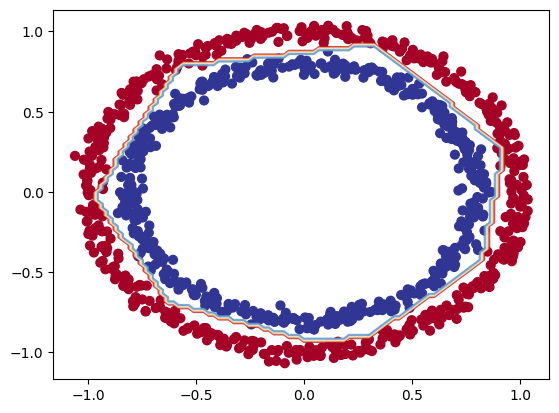

In [ ]:
numpy_mesh_plot(model=model_7, X=X, y=y)

### Out of all our attempts, model_7 worked !!

**Question** - What's wrong the predictions we've made ? Are
we really evaluating our model correctly?

**Hint** : What data
did the model learn on and what data did we predict on?



**Note:** Combination of linear and non-linear functions is one of the key fundamentals of neural networks

In [ ]:
# Let's create a toy tensor
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

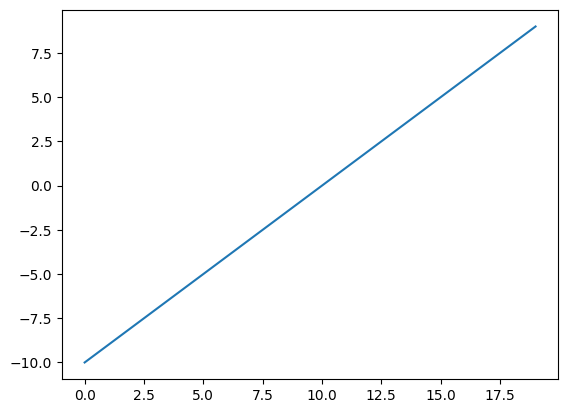

In [ ]:
plt.plot(A)

### Now, Let's replicate Sigmoid

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

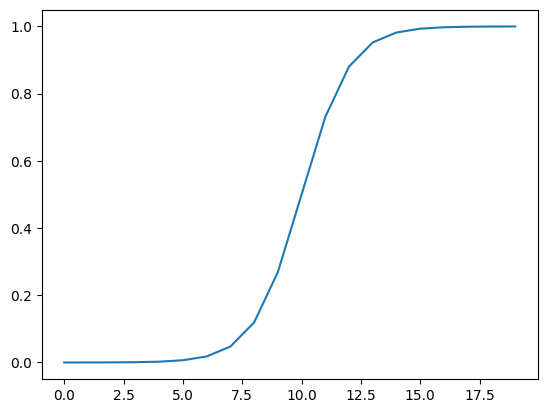

In [ ]:
plt.plot(sigmoid(A))

### Replicating ReLU

In [ ]:
def ReLU(x):
  return tf.math.maximum(0,x)



In [ ]:
ReLU(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

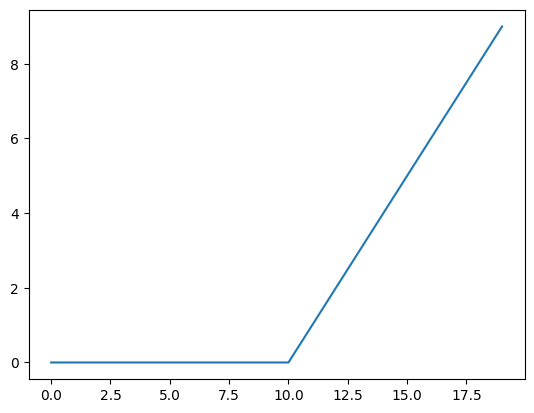

In [ ]:
plt.plot(ReLU(A))

### Replicating Linear Activation Function

In [ ]:
tf.keras.activations.linear(
    A
)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## Evaluating and improving our classification

In [ ]:
len(X)

1000

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
                )
history = model_8.fit(X_train, y_train, epochs=500)

Epoch 1/500
25/25 [==============================] - 1s 4ms/step - loss: 0.6959 - accuracy: 0.4750
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4737
Epoch 3/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4675
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.4762
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4988
Epoch 6/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.4925
Epoch 7/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.4963
Epoch 8/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5013
Epoch 9/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5075
Epoch 10/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5038
Epoch 11/

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9800


[0.07150833308696747, 0.9800000190734863]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 2ms/step
doing binary classification


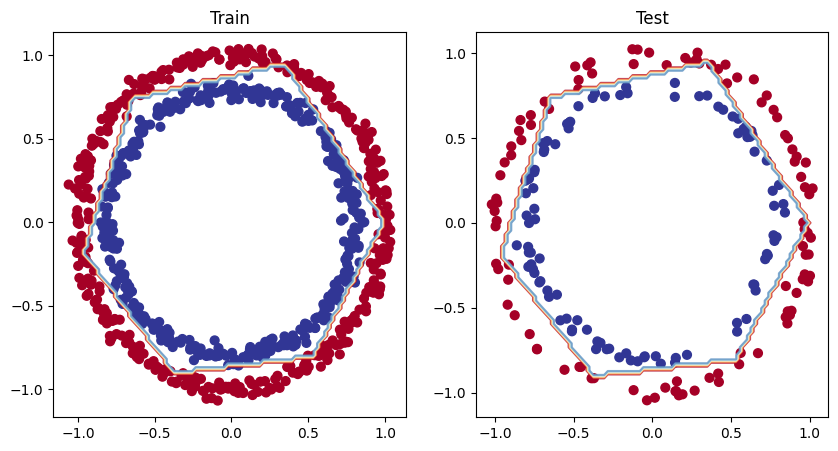

In [ ]:
# Let's plot the decision boundary for the training and the test set
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")
numpy_mesh_plot(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
numpy_mesh_plot(model_8, X_test, y_test)

## Let's plot the loss curves

In [ ]:
# Convert the history object in a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.695888,0.47500
1,0.695089,0.47375
2,0.694459,0.46750
3,0.693937,0.47625
4,0.693526,0.49875
...,...,...
495,0.054212,0.98250
496,0.054505,0.98500
497,0.055261,0.98250
498,0.055997,0.98500


Text(0.5, 1.0, 'Model_8 loss curve')

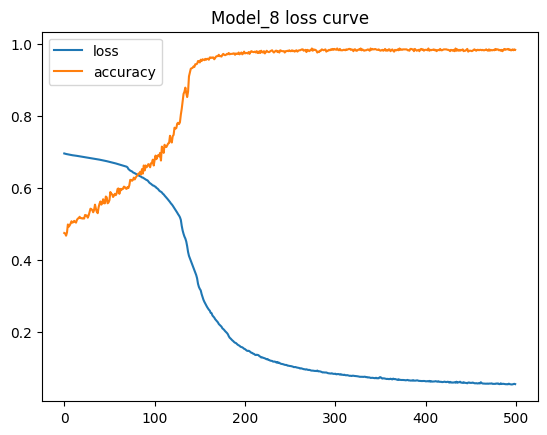

In [ ]:
# Plotting the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve")

## Finding the best learning rate

To find the ideal learning rate, we can use the following steps:

* A learning rate **callback**
* Modified loss curve plots

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
                )

# We are now introducing a callback before fitting the model

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20)) #At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at __init__, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.

history_9 = model_9.fit(X_train, y_train, epochs=500, callbacks=[lr_scheduler]) # We can pass multiple callbacks in the list of callbacks

Epoch 1/500
25/25 [==============================] - 2s 4ms/step - loss: 0.6930 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5125 - lr: 1.4125e-04
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

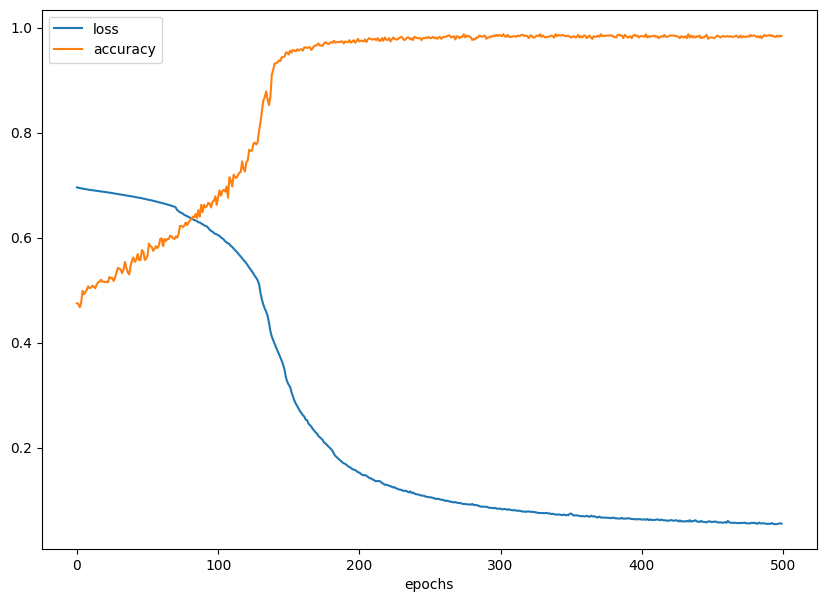

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

### Plotting lr v/s loss

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(500)/20))
lrs

<tf.Tensor: shape=(500,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

500

Text(0.5, 1.0, 'Learning Rate v/s Loss')

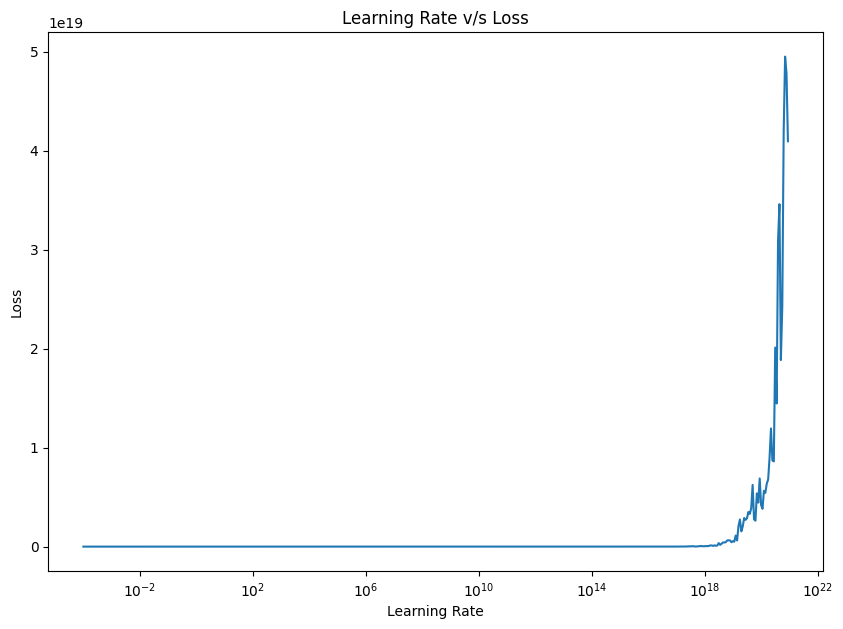

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"]) # X-axis => lr and Y-axis => Loss values from history
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate v/s Loss")

In [ ]:
#Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"]
                )
history = model_10.fit(X_train, y_train, epochs=500)

Epoch 1/500
25/25 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.4938
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.4950
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.4950
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.4913
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.4888
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.4900
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.4938
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5025
Epoch 10/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5088
Epoch 11/

In [ ]:
# Evaluating model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.3986 - accuracy: 0.8400


[0.39861035346984863, 0.8399999737739563]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0715 - accuracy: 0.9800


[0.07150833308696747, 0.9800000190734863]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


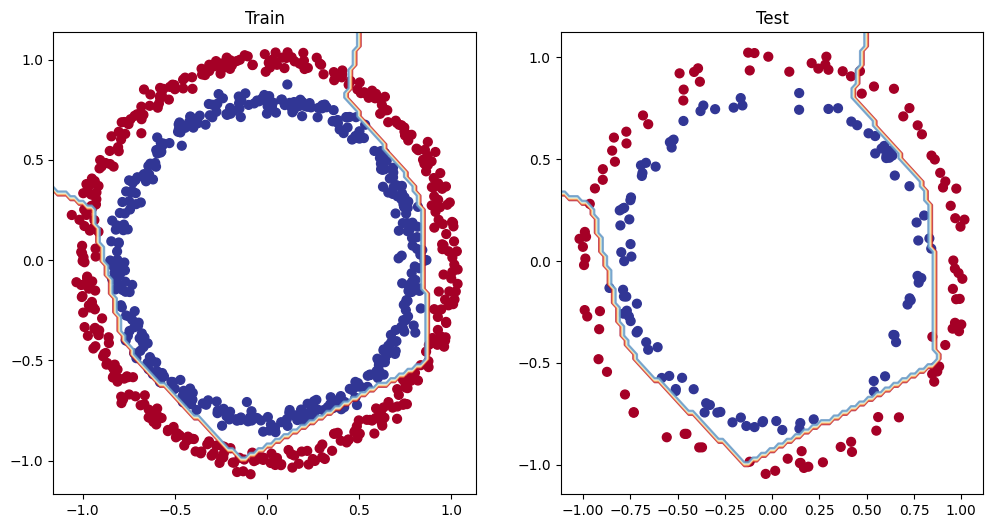

In [ ]:
# Decision boundary for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
numpy_mesh_plot(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
numpy_mesh_plot(model_10, X_test, y_test)
plt.show()

## More classification evaluation methods:

* Precision: Higher values means less false positives.

* Recall: Higher values means less false negatives.

> Note:Both of them can't be high, they are kinda inversely proportional. This is called precision/recall tradeoff

* F-1 score: Combination of precision and recall, usually good overall metric for a classification model.

* Confusion matrix: When comparing predictions to truth labels to see where model gets confused.



## Let's create a confusion matrix!!

In [ ]:
y_preds = model_10.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.7270341 ],
       [0.7270341 ],
       [0.7270341 ],
       [0.7270341 ],
       [0.300058  ],
       [0.20913844],
       [0.7270341 ],
       [0.7270341 ],
       [0.7270341 ],
       [0.01162838]], dtype=float32)

Looks like our predictions array has come out in prediction probability form.


Coverting prediction probabilities to binary format

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tf.round(y_preds))

array([[70, 31],
       [ 1, 98]])

How about we prettify our confusion matrix?

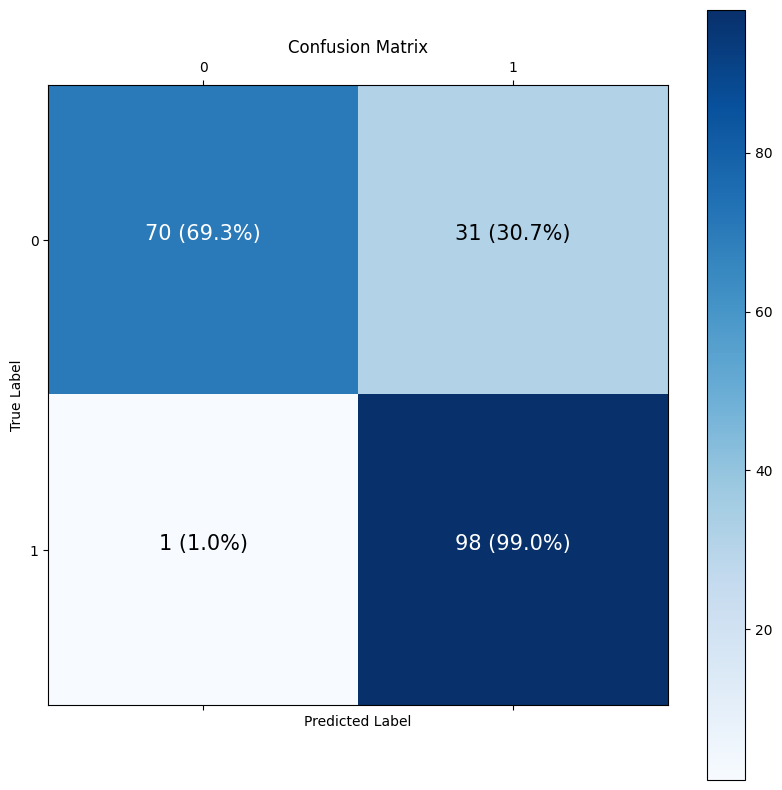

In [ ]:
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalizing our confusion matrix
n_classes = cm.shape[0]

fig, ax=plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)

fig.colorbar(cax)

classes = False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

threshold = (cm.max() + cm.min())/2

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

# The show begins now: Let's work on [fashion_mnist](https://keras.io/api/datasets/fashion_mnist/)

> When we have more than two classes as an option, it's known as multi-class classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
train_data[17], train_labels[90]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19,   4,
           0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   1,  72, 157, 222, 244,
         252, 148, 198, 200, 241, 201,  46,   0,   0,   0,   1,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,  31, 200, 211, 226, 224, 205, 211,
         242, 212, 246, 245, 194, 207, 212, 220, 120,   0,   0,   1,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0, 190, 217, 200, 200, 198, 196, 189,
         178, 198, 179, 164, 179, 182, 183, 182, 193, 196,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0, 101, 212, 196, 200, 198, 198, 197, 194,
         187, 189, 190, 186, 189, 186, 183, 174, 161, 175,  83,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0, 205, 213, 200, 200, 193, 194, 194, 193,
         189, 189, 186, 189, 183, 179, 171, 176, 163, 171, 175,   0,   0,
           0

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

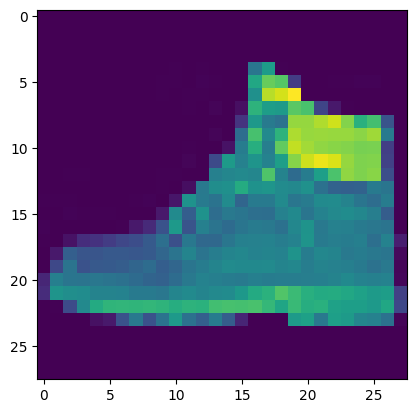

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[90])

In [ ]:
train_labels[90]

9

In [ ]:
# Creating a small list so that we can index onto our training labels so they're human readable

class_names = ["T-shirt/top"
,	"Trouser"
,	"Pullover"
,	"Dress"
,	"Coat"
,	"Sandal"
,	"Shirt"
,	"Sneaker"
,	"Bag"
,	"Ankle boot"]

len(class_names)


10

Text(0.5, 1.0, 'Ankle boot')

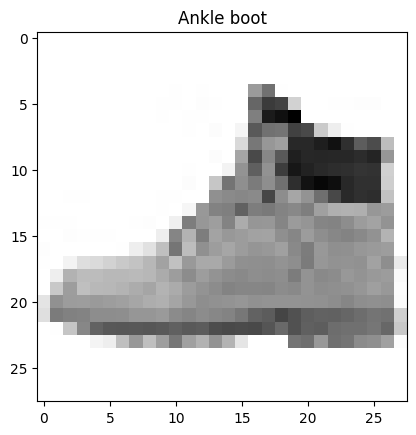

In [ ]:
# Plot an image with it's label
index_of_choice = 90
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

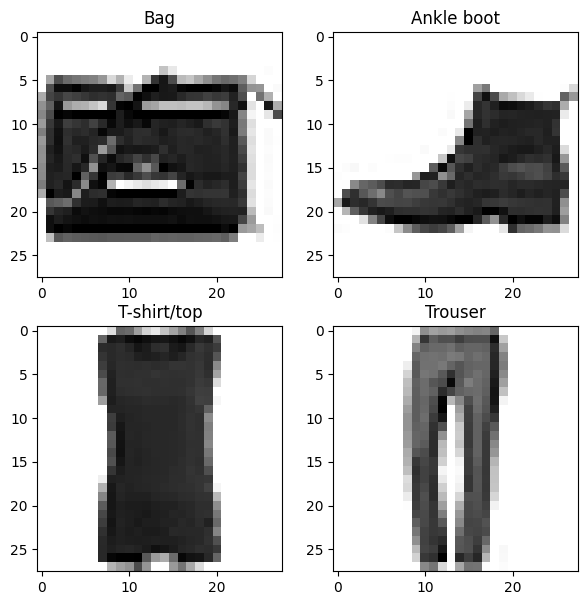

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

### Let's build a multi-class classfication model

In [ ]:
train_data[0].shape


(28, 28)

In [ ]:
len(class_names)

10

The shape of input is 28 * 28 and the shape of output is 10 (one per class of clothing)

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Flattening our data from (28*28) to (None, 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Two or more labels as integers
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4127 - accuracy: 0.0977 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3025 - val_accurac

Let's one-hot encode our train_labels and try categrical cross entropy

In [ ]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Flattening our data from (28*28) to (None, 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history12 = model_12.fit(
                         train_data,
                         tf.one_hot(train_labels, depth=10),
                         epochs=25,
                         validation_data=(test_data, tf.one_hot(test_labels, depth=10))
                         )

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4155 - accuracy: 0.0976 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3047 - val_accuracy:

In [ ]:
model_12.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

### Let's build a model for our normalized data

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

normalized_model = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2814 - accuracy: 0.5147 - val_loss: 0.9012 - val_accuracy: 0.6803
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7909 - accuracy: 0.7261 - val_loss: 0.7618 - val_accuracy: 0.7441
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6998 - accuracy: 0.7536 - val_loss: 0.7017 - val_accuracy: 0.7545
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6575 - accuracy: 0.7649 - val_loss: 0.6789 - val_accuracy: 0.7602
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6350 - accuracy: 0.7720 - val_loss: 0.6589 - val_accuracy: 0.7694
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6180 - accuracy: 0.7773 - val_loss: 0.6539 - val_accuracy: 0.7683
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6081 - accuracy: 0.7803 - val_loss: 0.6470 - val_accuracy:

🔑 **Note** - Just normalizing the data gave us a huge increase in accuracy

<Axes: title={'center': 'Normalized data'}>

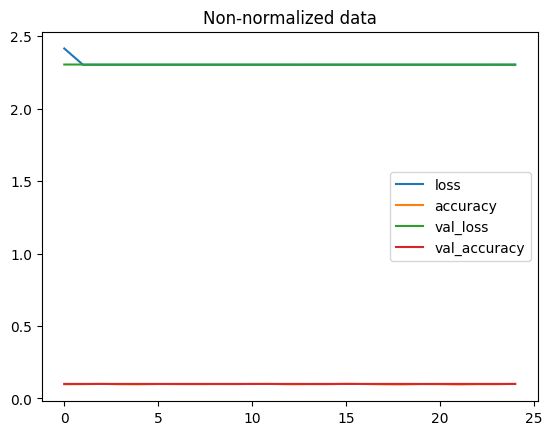

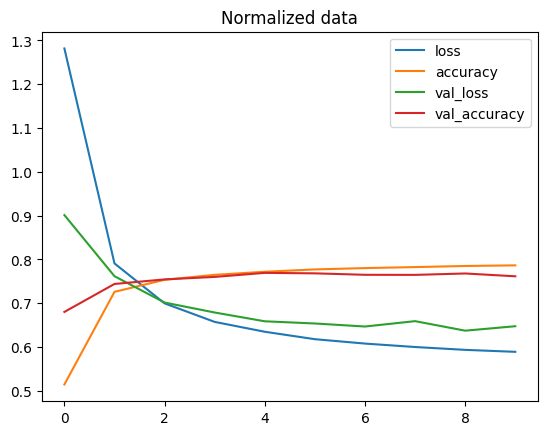

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history12.history).plot(title="Non-normalized data")
pd.DataFrame(normalized_model.history).plot(title="Normalized data")

> 🔑 **Note**: The same model with a slightly different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same critera

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/4.5)) #  lambda function calculates the learning rate for each epoch. The learning rate is set to be a base value (1e-3 or 0.001) multiplied by 10 raised to the power of (epoch/20). This means that the learning rate will increase exponentially with each epoch.

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=9,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/9
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0144 - accuracy: 0.6289 - val_loss: 0.6395 - val_accuracy: 0.7807 - lr: 0.0010
Epoch 2/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5885 - accuracy: 0.7954 - val_loss: 0.6103 - val_accuracy: 0.7942 - lr: 0.0017
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5617 - accuracy: 0.8044 - val_loss: 0.5914 - val_accuracy: 0.7861 - lr: 0.0028
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5522 - accuracy: 0.8077 - val_loss: 0.5750 - val_accuracy: 0.7982 - lr: 0.0046
Epoch 5/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5647 - accuracy: 0.8020 - val_loss: 0.5740 - val_accuracy: 0.8023 - lr: 0.0077
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5800 - accuracy: 0.7964 - val_loss: 0.6113 - val_accuracy: 0.7891 - lr: 0.0129
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/st

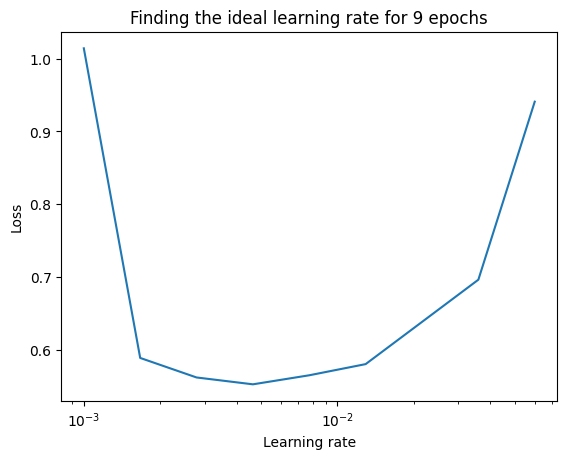

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(9)/4.5))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate for 9 epochs")
plt.show()

You can now build your model with the best learning rate as shown in the graph

##Evaluating our model

Confusion matrix

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalizing our confusion matrix
  n_classes = cm.shape[0]

  fig, ax=plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)

  fig.colorbar(cax)


  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  threshold = (cm.max() + cm.min())/2

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Making predictions with our model
y_probs = model_13.predict(test_data)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.4441926e-30, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.6829857e-03, 0.0000000e+00, 3.5218253e-29, 0.0000000e+00,
        9.9631709e-01, 0.0000000e+00]], dtype=float32)

##Remember to make predictions on the same kind of data the model was trained on (e.g. if the model is trained on normalized data, make the predictions on the normalized data )

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Let's convert all of the prediction probabilities into integers

y_preds = y_probs.argmax(axis=1)
y_preds[:5]

array([9, 8, 1, 1, 8])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Remember to make predictions on the same kind of data the mdoel was trained on (e.g. if the model is trained on normalized data, make the predictions on the normalized data )

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[  0,   5,   0, 732,  29,   0,   1,   0, 233,   0],
       [  0, 931,   0,  46,   0,   0,   0,   0,  23,   0],
       [  0,   2,   0,  36,   2,   0,   0,   0, 960,   0],
       [  0,  11,   0, 785,  18,   0,   0,   0, 186,   0],
       [  0,   1,   0,  13,   4,   0,   0,   0, 982,   0],
       [  0,   1,   0,   7,   0, 639,   0, 107,  27, 219],
       [  0,   4,   0, 176,  13,   0,   2,   0, 805,   0],
       [  0,   0,   0,   0,   0,  14,   0, 903,   0,  83],
       [  0,   1,   0,  17,   1,   2,   0,   9, 970,   0],
       [  0,   0,   0,   5,   0,   1,   0,  35,   1, 958]])

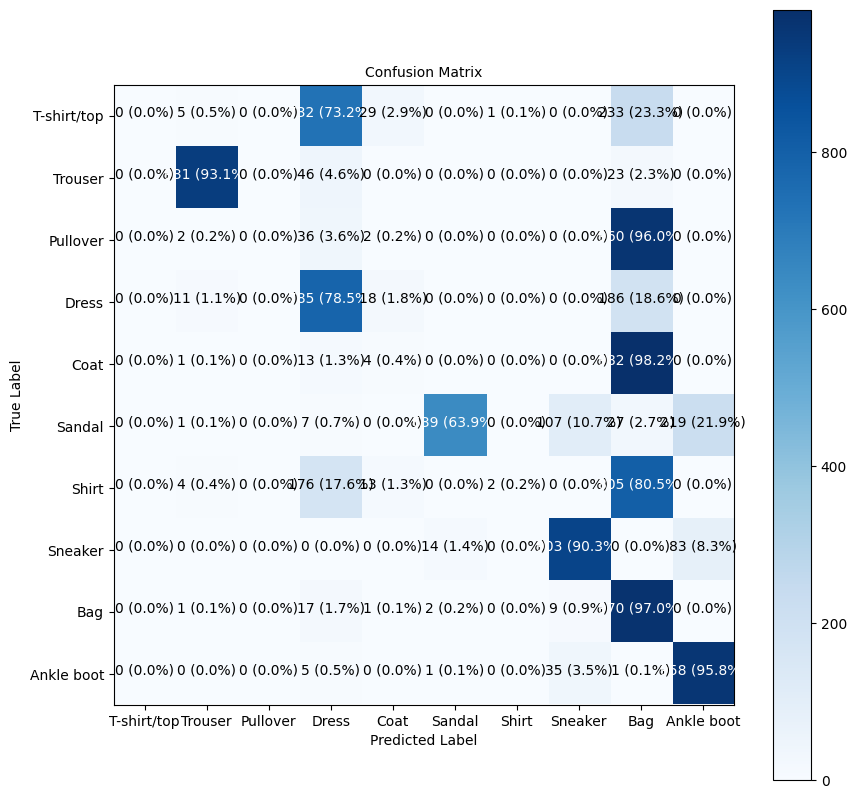

In [ ]:
make_confusion_matrix(y_true = test_labels,
                      y_pred=y_preds,
                      classes = class_names,
                      figsize=(10,10),
                      text_size=10)

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0,len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red


1/1 [==============================] - 0s 21ms/step


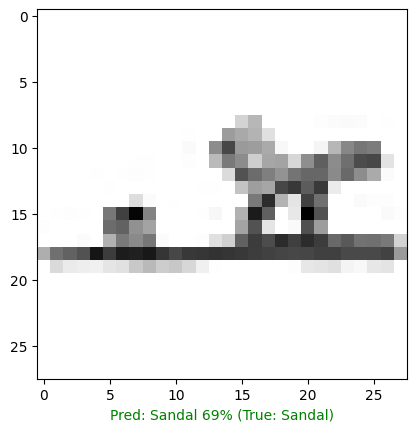

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_13,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

## Let's understand what patterns is our model learning

In [ ]:
model_13.layers

In [ ]:
model_13.layers[1]

In [ ]:
weights, biases = model_13.layers[1].get_weights()

weights, weights.shape

(array([[ 1.9217892 , -1.2951409 ,  3.2873237 , -4.337405  ],
        [ 2.68699   , -3.2045078 , -0.31381905, -2.6379297 ],
        [ 4.5442595 , -3.2001314 , -1.8211648 , -3.8209674 ],
        ...,
        [-2.5279608 ,  1.7042005 , -2.4754276 ,  0.08461871],
        [-2.6384244 ,  4.2804046 , -2.7251668 , -1.2637142 ],
        [ 1.0325694 ,  0.24565151, -0.07582549, -0.6233934 ]],
       dtype=float32),
 (784, 4))

In [ ]:
28*28

784

In [ ]:
model_13.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
biases, biases.shape

(array([ 7.7279744 , -6.1813054 ,  3.7262387 , -0.97601026], dtype=float32),
 (4,))

* Every neuron has a bias vector. Each of these is paired with a weights matrix.

* The bias vector is also initialized as zeros (atleast in the case of TensorFlow Dense layer).

* The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

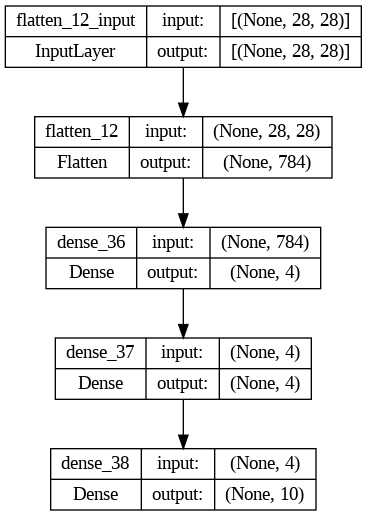

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_13, show_shapes=True)

## 🎉Congratulations, you have successfully covered classification with neural networks

END OF NOTEBOOK